In [1]:
# Preliminaries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# disable warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [49]:
# import data
root = 'C:/Users/Bowen/Desktop/IAQF/Data/'
df = pd.read_csv(root + 'all_data.csv', index_col='date', parse_dates=True)
df


,SPY,RUT,DJIA,STI,NI225,IXIC,HSI,NSEI,SX5E,MID,NDX,NYA,OEX,RUA,RUI,SML,SP1500,SPX
date,,,,,,,,,,,,,,,,,,
2013-02-07,125.377808,908.099976,13944.04980,2471.769321,86.662116,3165.129883,23177.00000,5938.799805,2597.919922,1102.62,2746.50,8893.75,679.68,898.64,838.20,509.19,349.74,1509.39
2013-02-08,126.075417,913.669983,13992.96973,2473.654957,84.079609,3193.870117,23215.16016,5903.500000,2630.300049,1109.09,2775.56,8935.24,683.04,903.90,843.08,512.24,351.73,1517.93
2013-02-14,126.482330,923.760010,13973.38965,2491.214815,86.203250,3198.659912,23413.25000,5896.950195,2635.350098,1117.12,2771.43,8953.07,684.94,906.61,845.05,517.23,352.77,1521.38
2013-02-15,126.332886,923.150024,13981.75977,2486.597270,86.854490,3192.030029,23444.56055,5887.399902,2615.260010,1115.75,2764.67,8933.22,683.97,905.77,844.24,516.43,352.39,1519.79
2013-02-19,127.279686,932.000000,14035.66992,2493.909174,88.205537,3213.590088,23143.91016,5939.700195,2662.370117,1123.74,2782.86,9004.38,689.26,912.36,850.22,521.94,355.01,1530.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-13,398.500000,1887.030029,34302.60938,2416.953750,215.223464,11079.160160,21738.66016,17956.599610,4150.799805,2580.91,11541.48,15918.37,1776.57,2317.66,2197.86,1238.88,916.96,3999.09
2023-01-17,397.769989,1884.290039,33910.85156,2415.439520,215.434597,11095.110350,21577.64063,18053.300780,4174.330078,2575.61,11557.19,15883.56,1773.23,2314.02,2194.39,1234.50,915.06,3990.97
2023-01-18,391.489990,1854.359985,33296.96094,2430.648531,220.702852,10957.009770,21678.00000,18165.349610,4174.339844,2543.36,11410.29,15649.13,1744.77,2278.39,2160.68,1215.10,900.98,3928.86


<AxesSubplot:xlabel='date'>

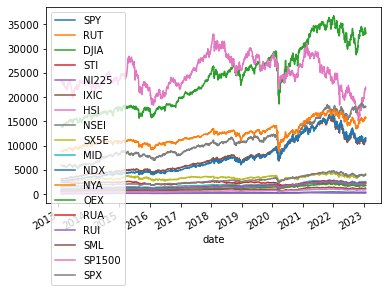

In [50]:
df.plot()

<AxesSubplot:xlabel='date'>

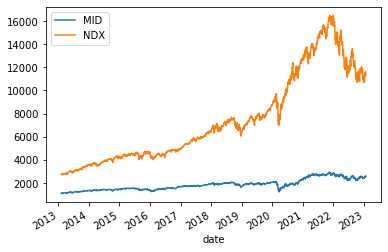

In [51]:
# define pairs
pairs = ['MID', 'NDX']
target = pairs[0]
feature = pairs[1]
data = df[[target, feature]]
data.plot()

In [52]:
# EDA


# 2. Rolling Linear Regression Residual and Sigma^2 
1. formula for rolling ols: spy = beta * rut + v
2. rolling period: 6mo * 20 trading days/mo = 120days/window
3. rollingOLS reference: https://lost-stats.github.io/Time_Series/Rolling_Regression.html

In [53]:
roll_period = 120

# supress y-intercept using -1

roll_reg = RollingOLS.from_formula(f'{target} ~ {feature} -1', window=roll_period, data=data)
roll_model = roll_reg.fit()


<AxesSubplot:xlabel='date'>

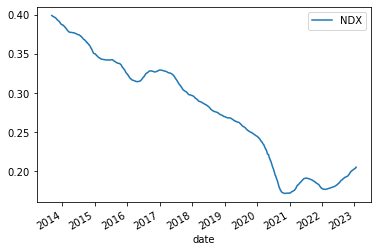

In [54]:
# plot beta vs. time
roll_model.params.plot()


In [55]:
# compute residuals, put into df, remove nan rows
roll_res = pd.DataFrame(data[f'{target}'] - roll_model.params[f'{feature}'] * data[f'{feature}'], columns=['res'])

# roll_model.params
roll_res.dropna(axis=0, inplace=True)
roll_res


,res
date,
2013-09-04,-51.930551
2013-09-05,-51.095823
2013-09-06,-50.086994
2013-09-10,-39.628300
2013-09-11,-35.838620
...,...
2023-01-13,219.834157
2023-01-17,208.528389
2023-01-18,203.575093


<AxesSubplot:xlabel='date'>

,res
count,1946.000000
mean,-28.962681
std,113.394238
min,-480.076202
25%,-78.144592
50%,-38.926839
75%,16.154345
max,347.065004


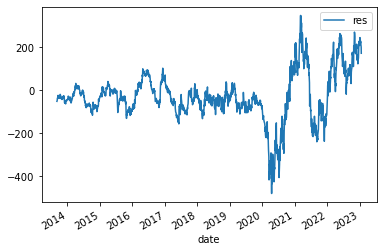

In [56]:
# plot residual
roll_res.plot()
roll_res.describe()

In [57]:
# find residual var_t
def stdt(res):
    """
    take res df, add var_t col
    input: df res
    output: df res with additional col named var
    """
    res['std'] = np.nan
    for i in range(len(res)):
        res.iloc[i-1,1] = np.std(res.iloc[:i, 0], ddof=1)
    res.iloc[-1, 1] = np.std(res.iloc[:,0], ddof=1)
    return res


In [58]:
stdt(roll_res)


,res,std
date,,
2013-09-04,-51.930551,NaN
2013-09-05,-51.095823,0.590242
2013-09-06,-50.086994,0.923148
2013-09-10,-39.628300,5.754324
2013-09-11,-35.838620,7.437934
...,...,...
2023-01-13,219.834157,113.050433
2023-01-17,208.528389,113.150169
2023-01-18,203.575093,113.244287


In [59]:
roll_res.describe()

,res,std
count,1946.000000,1945.000000
mean,-28.962681,56.355267
std,113.394238,29.015760
min,-480.076202,0.590242
25%,-78.144592,35.471600
50%,-38.926839,47.834789
75%,16.154345,84.404813
max,347.065004,113.394238


In [60]:
# sse for comparison with kf
roll_res['res2'] = roll_res['res'] ** 2
roll_sse = roll_res['res2'].sum()
roll_sse

26641679.02103224

# 3. Kalman Filter Set up
to simplify reference to parts of the equation, we denote the beta-hat_t|t formula as follows:

b_t = b_t-1 + k_gain * r_t

where b_t is the current beta, b_t-1 is the previous beta, r_t is current residual using current prices and b_t-1, k_gain is current feature / (current feature^2 * gamma^-1), where gamma = state variance / measurement error

 

In [14]:
# run first 120 day model (matching window), to establish baseline for kf model (b_0)
# compute base case

# get first 120 lines
base_df = data.iloc[:roll_period]
base_reg = ols(f'{target} ~ {feature} -1', data=base_df)
base_model = base_reg.fit()
base_model.params

NDX    0.398875
dtype: float64

In [15]:
# keep original df intact
kf = data.copy(deep=True)

In [16]:
# create new columns to contain needed variables
kf['Qt'] = np.nan
kf['Rt'] = np.nan
kf['wt'] = np.nan
kf['vt'] = np.nan
kf['b_tt-1'] = np.nan
kf['r_t'] = np.nan
kf['sv'] = np.nan
kf['me'] = np.nan
kf['gamma'] = np.nan
kf['b_tt'] = np.nan
kf

,MID,NDX,Qt,Rt,wt,vt,b_tt-1,r_t,sv,me,gamma,b_tt
date,,,,,,,,,,,,
2013-02-07,1102.62,2746.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-08,1109.09,2775.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-14,1117.12,2771.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-15,1115.75,2764.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-19,1123.74,2782.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-13,2580.91,11541.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-17,2575.61,11557.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-18,2543.36,11410.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Qt = sigw: var of  b_t, updated by row; initialized by random.rand

Rt = sigv: var of tgt, updated by row; initialized by rand generation according to 120 day ols var

wt (dist with var = Qt = sigw^2): generated from Qt

vt (dist with var = Rt = sigv^2): generated from Rt

b_tt-1: b_t-1 + wt; b_t-1 initialized by roll_period rows ols (b_0)

r_t = tgt - fea * b_tt-1

sv = P_tt-1: var of all b_tt-1 of prev rows; initialized with a rand sample from N(0, Qt)

me = Rt = sigv: var of spy of prev rows, updated by row

gamma = sv / me

b_tt = b_tt-1 + fea * r_t / (fea^2 + gamma^-1)

In [17]:
# fill in from 121st row
# Qt random initialize
kf.iloc[roll_period, 2] = np.random.rand()
# Rt initialize from var of spy for 1st 120r
kf.iloc[roll_period, 3] = np.var(kf.iloc[:roll_period, 1], ddof=1)
# generate wt
kf.iloc[roll_period, 4] = np.random.normal(0, kf.iloc[roll_period, 2])
# generate vt
kf.iloc[roll_period, 5] = np.random.normal(0, kf.iloc[roll_period, 3])
# compute b_tt-1
kf.iloc[roll_period, 6] = base_model.params[0] + kf.iloc[roll_period, 4]
# compute r_t
kf.iloc[roll_period, 7] = kf.iloc[roll_period, 0] - kf.iloc[roll_period, 1] * kf.iloc[roll_period, 6]
# initialize sv
kf.iloc[roll_period, 8] = np.random.normal(0, kf.iloc[roll_period, 2])
# insert me = Rt
kf.iloc[roll_period, 9] = kf.iloc[roll_period, 3]
# compute gamma
kf.iloc[roll_period, 10] = kf.iloc[roll_period, 8] / kf.iloc[roll_period, 9]
# compute b_tt
kf.iloc[roll_period, 11] = (kf.iloc[roll_period, 6] + kf.iloc[roll_period, 1] * kf.iloc[roll_period, 7] /
                            (kf.iloc[roll_period, 1] ** 2 + kf.iloc[roll_period, 10] ** (-1)))


In [18]:
kf.iloc[120:124]


,MID,NDX,Qt,Rt,wt,vt,b_tt-1,r_t,sv,me,gamma,b_tt
date,,,,,,,,,,,,
2013-09-05,1196.81,3129.94,0.658925,16405.320092,0.307108,-10660.455175,0.705983,-1012.874905,-1.105883,16405.320092,-0.000067,0.381884
2013-09-06,1198.69,3133.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-10,1229.25,3185.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-11,1230.49,3179.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# fill b_0 into kf[119, b_tt]
kf.iloc[roll_period - 1, 11] = base_model.params[0]
kf.iloc[roll_period - 1, 6] = base_model.params[0]
kf.iloc[roll_period - 1]

MID       1194.370000
NDX       3124.540000
Qt                NaN
Rt                NaN
wt                NaN
vt                NaN
b_tt-1       0.398875
r_t               NaN
sv                NaN
me                NaN
gamma             NaN
b_tt         0.398875
Name: 2013-09-04 00:00:00, dtype: float64

In [20]:
# fill in val of all following rows:
for i in range(roll_period + 1, len(kf)):
    # compute Qt 
    kf.iloc[i, 2] = np.var(kf.iloc[roll_period - 1:i, 11], ddof=1)
    # compute Rt
    kf.iloc[i, 3] = np.var(kf.iloc[roll_period - 1:i, 0], ddof=1)
    # generate wt
    kf.iloc[i, 4] = np.random.normal(0, kf.iloc[i, 2])
    # generate vt
    kf.iloc[i, 5] = np.random.normal(0, kf.iloc[i, 3])
    # compute b_tt-1
    kf.iloc[i, 6] = kf.iloc[i - 1, 11] + kf.iloc[i, 4]
    # compute r_t
    kf.iloc[i, 7] = kf.iloc[i, 0] - kf.iloc[i, 1] * kf.iloc[i, 6]
    # compute sv
    kf.iloc[i, 8] = np.var(kf.iloc[119:i, 6], ddof=1)
    # insert me = Rt
    kf.iloc[i, 9] = kf.iloc[i, 3]
    # compute gamma
    kf.iloc[i, 10] = kf.iloc[i, 8] / kf.iloc[i, 9]
    # compute b_tt
    kf.iloc[i, 11] = kf.iloc[i, 6] + kf.iloc[i, 1] * kf.iloc[i, 7] / (kf.iloc[i, 1] ** 2 + kf.iloc[i, 10] ** (-1))


In [21]:
kf[roll_period:roll_period + 15]

,MID,NDX,Qt,Rt,wt,vt,b_tt-1,r_t,sv,me,gamma,b_tt
date,,,,,,,,,,,,
2013-09-05,1196.81,3129.94,0.658925,16405.320092,3.071083e-01,-10660.455175,0.705983,-1012.874905,-1.105883,16405.320092,-0.000067,0.381884
2013-09-06,1198.69,3133.38,0.000144,2.976800,-1.409782e-04,-3.572608,0.381743,2.544150,0.047158,2.976800,0.015842,0.382555
2013-09-10,1229.25,3185.07,0.000093,4.691733,8.459609e-05,4.966453,0.382640,10.516307,0.033290,4.691733,0.007095,0.385941
2013-09-11,1230.49,3179.86,0.000063,269.252667,4.269120e-05,674.827868,0.385984,3.115148,0.025380,269.252667,0.000094,0.386963
2013-09-12,1226.67,3175.57,0.000047,334.140320,3.421493e-05,-117.919473,0.386997,-2.265318,0.020358,334.140320,0.000061,0.386285
2013-09-13,1229.40,3178.27,0.000038,314.061507,-2.810146e-05,31.116125,0.386256,1.772665,0.016970,314.061507,0.000054,0.386813
2013-09-17,1245.13,3190.83,0.000031,301.495757,1.413323e-05,555.925079,0.386827,10.829771,0.014560,301.495757,0.000048,0.390214
2013-09-18,1257.39,3231.31,0.000028,371.171498,2.142515e-08,-313.894112,0.390214,-3.513969,0.012742,371.171498,0.000034,0.389130
2013-09-19,1254.56,3237.61,0.000025,489.801200,-2.377641e-05,-827.697809,0.389106,-5.214317,0.011299,489.801200,0.000023,0.387502


In [22]:
kf.tail()

,MID,NDX,Qt,Rt,wt,vt,b_tt-1,r_t,sv,me,gamma,b_tt
date,,,,,,,,,,,,
2023-01-13,2580.91,11541.48,0.004534,196027.260057,0.008610,132775.180794,0.233588,-115.045781,0.004631,196027.260057,2.362307e-08,0.226024
2023-01-17,2575.61,11557.19,0.004533,196184.533941,-0.003473,115110.853378,0.222552,3.539104,0.004629,196184.533941,2.359594e-08,0.222784
2023-01-18,2543.36,11410.29,0.004532,196337.532996,-0.002516,82140.397333,0.220268,30.037235,0.004628,196337.532996,2.357194e-08,0.222254
2023-01-19,2516.89,11295.67,0.004531,196467.350778,-0.000674,272768.918541,0.221579,14.002004,0.004627,196467.350778,2.355137e-08,0.222509
2023-01-20,2558.46,11619.03,0.004530,196578.932889,0.005401,19927.234456,0.227910,-89.635049,0.004626,196578.932889,2.353265e-08,0.222043


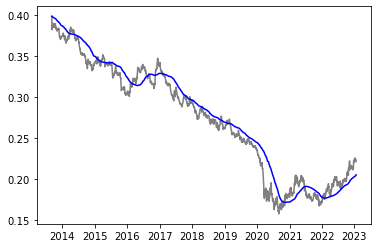

In [45]:
# plot b_tt
plt.plot(kf['b_tt'], c='grey')
plt.plot(roll_model.params, c='b')

kf: grey, roll: blue <br>

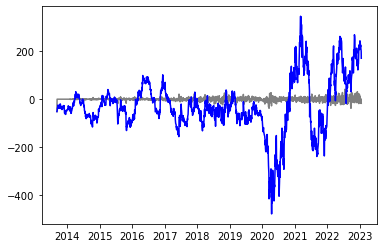

In [46]:
# compute residuals
kf_res = pd.DataFrame(kf[f'{target}'] - kf[f'{feature}'] * kf['b_tt'], columns=['res'])

# plot residuals
plt.plot(kf_res, c='grey')
plt.plot(roll_res.iloc[:,0], c='b')

In [25]:
kf_res.describe()

,res
count,1946.000000
mean,-0.407163
std,7.119463
min,-51.930551
25%,-3.330187
50%,-0.117695
75%,2.743890
max,58.659647


In [26]:
stdt(kf_res)

,res,std
date,,
2013-02-07,NaN,NaN
2013-02-08,NaN,NaN
2013-02-14,NaN,NaN
2013-02-15,NaN,NaN
2013-02-19,NaN,NaN
...,...,...
2023-01-13,-27.743746,7.107949
2023-01-17,0.852452,7.106176
2023-01-18,7.382075,7.106540


In [27]:
kf_res['res2'] = kf_res['res'] ** 2
kf_sse = kf_res['res2'].sum()
kf_sse
print(kf_sse < roll_sse)

98908.35985937908

True


# 4. Generate Buy/Sell Signals
1. func to generate b/s singals, using different k
2. generate b/s using kf and rolling beta

In [28]:
# function that generates b/s signal, based on residual and var. 
# k's same as  paper are tested.
def signalBS(residual, k=[0.5, 1, 2, 3]):
    """
    generate new columns in residual df containing buy/sell signals for each day by evaluating buy if res > k*std;
    +1 for buy and -1 for sell
    input: residual: df containing residual of each day and std of all residual up to time t; k: array of constant k as 
    parameter
    output: updated df residual with new columns generated containing b/s decisions
    """
    for n in k:
        residual[f'{n}_std'] = residual['std'] * n
        residual[f'{n}_{target}'] = np.nan
        residual[f'{n}_{feature}'] = np.nan
        for i in range(len(residual)):
            if residual['res'][i] >= residual[f'{n}_std'][i]:
                residual[f'{n}_{target}'][i] = -1
                residual[f'{n}_{feature}'][i] = 1
            elif residual['res'][i] <= - residual[f'{n}_std'][i]:
                residual[f'{n}_{target}'][i] = 1
                residual[f'{n}_{feature}'][i] = -1
            else: 
                residual[f'{n}_{target}'][i] = 0
                residual[f'{n}_{feature}'][i] = 0
                
    return residual.copy(deep=True)
    

In [29]:
# generate rolling ols bs signals, cut off first 2 rows as kf used it as initiation 
roll_bs = signalBS(roll_res)
roll_bs = roll_bs.iloc[2:,:]
roll_bs


,res,std,res2,0.5_std,0.5_MID,0.5_NDX,1_std,1_MID,1_NDX,2_std,2_MID,2_NDX,3_std,3_MID,3_NDX
date,,,,,,,,,,,,,,,
2013-09-06,-50.086994,0.923148,2508.706997,0.461574,1.0,-1.0,0.923148,1.0,-1.0,1.846295,1.0,-1.0,2.769443,1.0,-1.0
2013-09-10,-39.628300,5.754324,1570.402148,2.877162,1.0,-1.0,5.754324,1.0,-1.0,11.508648,1.0,-1.0,17.262973,1.0,-1.0
2013-09-11,-35.838620,7.437934,1284.406667,3.718967,1.0,-1.0,7.437934,1.0,-1.0,14.875869,1.0,-1.0,22.313803,1.0,-1.0
2013-09-12,-37.451825,7.459304,1402.639219,3.729652,1.0,-1.0,7.459304,1.0,-1.0,14.918608,1.0,-1.0,22.377912,1.0,-1.0
2013-09-13,-35.339399,7.611654,1248.873121,3.805827,1.0,-1.0,7.611654,1.0,-1.0,15.223308,1.0,-1.0,22.834961,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-13,219.834157,113.050433,48327.056633,56.525217,-1.0,1.0,113.050433,-1.0,1.0,226.100866,0.0,0.0,339.151299,0.0,0.0
2023-01-17,208.528389,113.150169,43484.088980,56.575084,-1.0,1.0,113.150169,-1.0,1.0,226.300338,0.0,0.0,339.450507,0.0,0.0
2023-01-18,203.575093,113.244287,41442.818461,56.622143,-1.0,1.0,113.244287,-1.0,1.0,226.488574,0.0,0.0,339.732861,0.0,0.0


In [30]:
roll_bs.describe()

,res,std,res2,0.5_std,0.5_MID,0.5_NDX,1_std,1_MID,1_NDX,2_std,2_MID,2_NDX,3_std,3_MID,3_NDX
count,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000
mean,-28.939481,56.383952,13701.837169,28.191976,0.360597,-0.360597,56.383952,0.329218,-0.329218,112.767905,0.198045,-0.198045,169.151857,0.119342,-0.119342
std,113.450273,28.995626,26354.607237,14.497813,0.838541,0.838541,28.995626,0.733473,0.733473,57.991253,0.492221,0.492221,86.986879,0.336731,0.336731
min,-480.076202,0.923148,0.022113,0.461574,-1.000000,-1.000000,0.923148,-1.000000,-1.000000,1.846295,-1.000000,-1.000000,2.769443,-1.000000,-1.000000
25%,-78.154979,35.492436,1070.531113,17.746218,0.000000,-1.000000,35.492436,0.000000,-1.000000,70.984873,0.000000,0.000000,106.477309,0.000000,0.000000
50%,-38.899840,47.836021,4292.638004,23.918010,1.000000,-1.000000,47.836021,0.000000,0.000000,95.672041,0.000000,0.000000,143.508062,0.000000,0.000000
75%,16.271421,84.407081,11838.634232,42.203540,1.000000,0.000000,84.407081,1.000000,0.000000,168.814161,0.000000,0.000000,253.221242,0.000000,0.000000
max,347.065004,113.394238,230473.159267,56.697119,1.000000,1.000000,113.394238,1.000000,1.000000,226.788476,1.000000,1.000000,340.182713,1.000000,1.000000


In [31]:
# kf bs
kf_bs = signalBS(kf_res)
kf_bs.iloc[121:].describe()

,res,std,res2,0.5_std,0.5_MID,0.5_NDX,1_std,1_MID,1_NDX,2_std,2_MID,2_NDX,3_std,3_MID,3_NDX
count,1944.000000,1944.000000,1.944000e+03,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000
mean,-0.381659,4.923927,4.949034e+01,2.461963,0.046296,-0.046296,4.923927,0.022119,-0.022119,9.847853,0.018004,-0.018004,14.771780,0.007202,-0.007202
std,7.026384,1.815970,1.329099e+02,0.907985,0.769943,0.769943,1.815970,0.610446,0.610446,3.631939,0.353186,0.353186,5.447909,0.207799,0.207799
min,-39.999125,3.116416,2.675597e-10,1.558208,-1.000000,-1.000000,3.116416,-1.000000,-1.000000,6.232832,-1.000000,-1.000000,9.349248,-1.000000,-1.000000
25%,-3.322892,3.460821,1.130927e+00,1.730411,-1.000000,-1.000000,3.460821,0.000000,0.000000,6.921642,0.000000,0.000000,10.382463,0.000000,0.000000
50%,-0.117695,4.919887,9.346412e+00,2.459944,0.000000,0.000000,4.919887,0.000000,0.000000,9.839775,0.000000,0.000000,14.759662,0.000000,0.000000
75%,2.747136,5.827143,4.549232e+01,2.913571,1.000000,1.000000,5.827143,0.000000,0.000000,11.654286,0.000000,0.000000,17.481428,0.000000,0.000000
max,58.659647,30.435246,3.440954e+03,15.217623,1.000000,1.000000,30.435246,1.000000,1.000000,60.870493,1.000000,1.000000,91.305739,1.000000,1.000000


In [32]:
kf_bs.iloc[121:]

,res,std,res2,0.5_std,0.5_MID,0.5_NDX,1_std,1_MID,1_NDX,2_std,2_MID,2_NDX,3_std,3_MID,3_NDX
date,,,,,,,,,,,,,,,
2013-09-06,0.000016,30.435246,2.675597e-10,15.217623,0.0,0.0,30.435246,0.0,0.0,60.870493,0.0,0.0,91.305739,0.0,0.0
2013-09-10,0.000146,26.231314,2.134394e-08,13.115657,0.0,0.0,26.231314,0.0,0.0,52.462627,0.0,0.0,78.693941,0.0,0.0
2013-09-11,0.003265,23.405611,1.066012e-05,11.702806,0.0,0.0,23.405611,0.0,0.0,46.811222,0.0,0.0,70.216833,0.0,0.0
2013-09-12,-0.003681,21.334810,1.355082e-05,10.667405,0.0,0.0,21.334810,0.0,0.0,42.669620,0.0,0.0,64.004430,0.0,0.0
2013-09-13,0.003242,19.733156,1.050944e-05,9.866578,0.0,0.0,19.733156,0.0,0.0,39.466311,0.0,0.0,59.199467,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-13,-27.743746,7.107949,7.697154e+02,3.553974,1.0,-1.0,7.107949,1.0,-1.0,14.215898,1.0,-1.0,21.323847,1.0,-1.0
2023-01-17,0.852452,7.106176,7.266737e-01,3.553088,0.0,0.0,7.106176,0.0,0.0,14.212351,0.0,0.0,21.318527,0.0,0.0
2023-01-18,7.382075,7.106540,5.449503e+01,3.553270,-1.0,1.0,7.106540,-1.0,1.0,14.213081,0.0,0.0,21.319621,0.0,0.0


# 5. Backtest Returns
1. find historical returns
2. adjust all df (return, kf b/s, rolling b/s) of various k's to same # of rows
3. split each b/s into 3 df contianing data of single k's, contain them in matrix. (2-3 are weird, i do this just bc idk how to better organize the data structure early on. if it works, it works yea?)
4. compute back test return results
5. plot backtest results

In [33]:
# find daily returns from df
data[f'{target}_ret'] = data[f'{target}'].pct_change(1)
data[f'{feature}_ret'] = data[f'{feature}'].pct_change(1)
df

,SPY,RUT,DJIA,STI,NI225,IXIC,HSI,NSEI,SX5E,MID,NDX,NYA,OEX,RUA,RUI,SML,SP1500,SPX
date,,,,,,,,,,,,,,,,,,
2013-02-07,125.377808,908.099976,13944.04980,2471.769321,86.662116,3165.129883,23177.00000,5938.799805,2597.919922,1102.62,2746.50,8893.75,679.68,898.64,838.20,509.19,349.74,1509.39
2013-02-08,126.075417,913.669983,13992.96973,2473.654957,84.079609,3193.870117,23215.16016,5903.500000,2630.300049,1109.09,2775.56,8935.24,683.04,903.90,843.08,512.24,351.73,1517.93
2013-02-14,126.482330,923.760010,13973.38965,2491.214815,86.203250,3198.659912,23413.25000,5896.950195,2635.350098,1117.12,2771.43,8953.07,684.94,906.61,845.05,517.23,352.77,1521.38
2013-02-15,126.332886,923.150024,13981.75977,2486.597270,86.854490,3192.030029,23444.56055,5887.399902,2615.260010,1115.75,2764.67,8933.22,683.97,905.77,844.24,516.43,352.39,1519.79
2013-02-19,127.279686,932.000000,14035.66992,2493.909174,88.205537,3213.590088,23143.91016,5939.700195,2662.370117,1123.74,2782.86,9004.38,689.26,912.36,850.22,521.94,355.01,1530.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-13,398.500000,1887.030029,34302.60938,2416.953750,215.223464,11079.160160,21738.66016,17956.599610,4150.799805,2580.91,11541.48,15918.37,1776.57,2317.66,2197.86,1238.88,916.96,3999.09
2023-01-17,397.769989,1884.290039,33910.85156,2415.439520,215.434597,11095.110350,21577.64063,18053.300780,4174.330078,2575.61,11557.19,15883.56,1773.23,2314.02,2194.39,1234.50,915.06,3990.97
2023-01-18,391.489990,1854.359985,33296.96094,2430.648531,220.702852,10957.009770,21678.00000,18165.349610,4174.339844,2543.36,11410.29,15649.13,1744.77,2278.39,2160.68,1215.10,900.98,3928.86


In [34]:
# cut index df, KF bs df, rolling bs df, to the same size by matching indices
data = data[data.index.isin(roll_bs.index)]
kf_bs = kf_bs[kf_bs.index.isin(roll_bs.index)]


In [35]:
# reorganize b/s signals into arrays containing dfs for easier manipulation
def splitBS(bs):
    """
    split current b/s signal df into an array containing 3 dfs, each containing b/s for a single k
    input: bs: 1 big df containing random stuff and b/s signals
    output: res: array with 3 dfs each with b/s signal for a single k
    """
    k05 = bs[[f'0.5_{target}', f'0.5_{feature}']].rename(columns={f'0.5_{target}': f'{target}', f'0.5_{feature}': f'{feature}'})
    k1 = bs[[f'1_{target}', f'1_{feature}']].rename(columns={f'1_{target}': f'{target}', f'1_{feature}': f'{feature}'})
    k2 = bs[[f'2_{target}', f'2_{feature}']].rename(columns={f'2_{target}': f'{target}', f'2_{feature}': f'{feature}'})
    k3 = bs[[f'3_{target}', f'3_{feature}']].rename(columns={f'3_{target}': f'{target}', f'3_{feature}': f'{feature}'})
    res = [k05, k1, k2, k3]
    return res


In [36]:
# split the bs dataframes
rolls = splitBS(roll_bs)
kfs = splitBS(kf_bs)
kfs

[            MID  NDX
 date                
 2013-09-06  0.0  0.0
 2013-09-10  0.0  0.0
 2013-09-11  0.0  0.0
 2013-09-12  0.0  0.0
 2013-09-13  0.0  0.0
 ...         ...  ...
 2023-01-13  1.0 -1.0
 2023-01-17  0.0  0.0
 2023-01-18 -1.0  1.0
 2023-01-19  0.0  0.0
 2023-01-20  1.0 -1.0
 
 [1944 rows x 2 columns],
             MID  NDX
 date                
 2013-09-06  0.0  0.0
 2013-09-10  0.0  0.0
 2013-09-11  0.0  0.0
 2013-09-12  0.0  0.0
 2013-09-13  0.0  0.0
 ...         ...  ...
 2023-01-13  1.0 -1.0
 2023-01-17  0.0  0.0
 2023-01-18 -1.0  1.0
 2023-01-19  0.0  0.0
 2023-01-20  1.0 -1.0
 
 [1944 rows x 2 columns],
             MID  NDX
 date                
 2013-09-06  0.0  0.0
 2013-09-10  0.0  0.0
 2013-09-11  0.0  0.0
 2013-09-12  0.0  0.0
 2013-09-13  0.0  0.0
 ...         ...  ...
 2023-01-13  1.0 -1.0
 2023-01-17  0.0  0.0
 2023-01-18  0.0  0.0
 2023-01-19  0.0  0.0
 2023-01-20  1.0 -1.0
 
 [1944 rows x 2 columns],
             MID  NDX
 date                
 2013-09-06  0

In [37]:
# function for backtest returns
def backtest(arr, ret, k=[0.5, 1, 2, 3]):
    """
    applying b/s on daily ret, find daily total ret, then cumprod to find cumret
    input: arr: array containing 3 df, each containing b/s resulting from a k; ret: 1df containing daily ret
    ouput: res: 1 df containing cumret
    """
    res = pd.DataFrame()
    # multiply daily ret inplace of b/s, find sum of two ret for daily ret, then cumprod
    for i, d in enumerate(arr):
        d[f'{target}_ret'] = d[f'{target}'].shift(1) * ret[f'{target}_ret']
        d[f'{feature}_ret'] = d[f'{feature}'].shift(1) * ret[f'{feature}_ret']
        d['dret'] = d[f'{target}_ret'] + d[f'{feature}_ret']
        d.dropna(inplace=True)
        d['cumpl'] = np.cumprod(1 + d['dret'].values)
        n = k[i]
        res[f'{n}'] = d['cumpl']
    return res


In [38]:
roll_backtest = backtest(rolls, data)
kf_backtest = backtest(kfs, data)


<AxesSubplot:xlabel='date'>

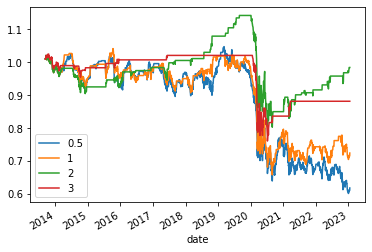

In [47]:
roll_backtest.plot()

<AxesSubplot:xlabel='date'>

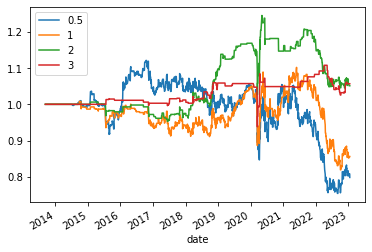

In [48]:
kf_backtest.plot()